# Initial Setup

In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

In [110]:
data = pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [111]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Column Names and Descriptions

* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

# Data Cleaning and Exploration

## Checking and filling in null values

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [113]:
# Checking for columns with null or missing values first
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [114]:
data['waterfront'].value_counts(normalize = True,dropna = False)

0.0    0.883225
NaN    0.110015
1.0    0.006760
Name: waterfront, dtype: float64

The high percentage of non-waterfront properties indicates that replacing nulls with 0 is viable.

In [115]:
data['view'].value_counts(normalize = True,dropna = False)

0.0    0.899292
2.0    0.044312
3.0    0.023522
1.0    0.015280
4.0    0.014678
NaN    0.002917
Name: view, dtype: float64

Most properties have not been viewed at all indicating that replacing with 0 is viable. View appears as if it can be converted to a binary variable.

In [116]:
data['yr_renovated'].value_counts(normalize = True, dropna = False)

0.0       0.787656
NaN       0.177895
2014.0    0.003380
2003.0    0.001435
2013.0    0.001435
            ...   
1944.0    0.000046
1948.0    0.000046
1976.0    0.000046
1934.0    0.000046
1953.0    0.000046
Name: yr_renovated, Length: 71, dtype: float64

High percentage of homes not being renovated at all. It appears as if it can be converted to a binary variable.

In [117]:
data2 = data
data2.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [118]:
# Filling in null values for waterfront with 0

data2['waterfront'] = data2['waterfront'].fillna(0)

In [119]:
# Confirming changes
data2['waterfront'] = data2['waterfront'].astype('int64')
data2['waterfront'].value_counts(normalize = True)

0    0.99324
1    0.00676
Name: waterfront, dtype: float64

In [120]:
# Filling in null values for view with 0

data2['view'] = data2['view'].fillna(0)

In [121]:
# Confirming changes

data2['view'] = data2['view'].astype('int64')
data2['view'].value_counts(normalize = True)

0    0.902209
2    0.044312
3    0.023522
1    0.015280
4    0.014678
Name: view, dtype: float64

In [122]:
data2['yr_renovated'] = data2['yr_renovated'].fillna(0)

In [123]:
data2['yr_renovated'] = data2['yr_renovated'].astype('int64')
data2['yr_renovated'].value_counts(normalize = True)

0       0.965551
2014    0.003380
2003    0.001435
2013    0.001435
2007    0.001389
          ...   
1976    0.000046
1953    0.000046
1951    0.000046
1946    0.000046
1944    0.000046
Name: yr_renovated, Length: 70, dtype: float64

In [124]:
# Confirming all null columns have been handled
data2.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Dealing with duplicates

In [126]:
#Checking for duplicated rows that may be in the dataset
duplicated_rows = data2[data2.duplicated()]
duplicated_rows

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


No duplicated rows found.

In [127]:
for col in data2.columns:
    print(data2[col].value_counts())

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64
6/23/2014     142
6/25/2014     131
6/26/2014     131
7/8/2014      127
4/27/2015     126
             ... 
1/17/2015       1
8/3/2014        1
11/30/2014      1
5/17/2014       1
7/27/2014       1
Name: date, Length: 372, dtype: int64
350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64
2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25

Looking at the value counts for ids reveals that are multiples of the same id in this dataset. This is most likely due to the same house being resold multiple times over the year span.

I also noted that there is a '?' value for sqft_basement column which I will address later on.

In [128]:
# Checking to see number of duplicated ids
data3 = data2
duplicate_ids = data3[data3.duplicated(['id'])]
duplicate_ids

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,0,0,...,8,1290,290.0,1939,0,98117,47.6870,-122.386,1570,4500
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,0,3,...,11,2690,1600.0,1997,0,98006,47.5503,-122.102,3860,11244
325,7520000520,3/11/2015,240500.0,2,1.00,1240,12092,1.0,0,0,...,6,960,280.0,1922,1984,98146,47.4957,-122.352,1820,7460
346,3969300030,12/29/2014,239900.0,4,1.00,1000,7134,1.0,0,0,...,6,1000,0.0,1943,0,98178,47.4897,-122.240,1020,7138
372,2231500030,3/24/2015,530000.0,4,2.25,2180,10754,1.0,0,0,...,7,1100,1080.0,1954,0,98133,47.7711,-122.341,1810,6929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20165,7853400250,2/19/2015,645000.0,4,3.50,2910,5260,2.0,0,0,...,9,2910,0.0,2012,0,98065,47.5168,-121.883,2910,5260
20597,2724049222,12/1/2014,220000.0,2,2.50,1000,1092,2.0,0,0,...,7,990,10.0,2004,0,98118,47.5419,-122.271,1330,1466
20654,8564860270,3/30/2015,502000.0,4,2.50,2680,5539,2.0,0,0,...,8,2680,0.0,2013,0,98045,47.4759,-121.734,2680,5992
20764,6300000226,5/4/2015,380000.0,4,1.00,1200,2171,1.5,0,0,...,7,1200,0.0,1933,0,98133,47.7076,-122.342,1130,1598


In [129]:
# Checking to see all unique and duplicated rows

duplicate_ids = data3[data3.duplicated(['id'], keep = False)]
duplicate_ids

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,7/25/2014,430000.0,3,1.50,1580,5000,1.0,0,0,...,8,1290,290.0,1939,0,98117,47.6870,-122.386,1570,4500
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,0,0,...,8,1290,290.0,1939,0,98117,47.6870,-122.386,1570,4500
313,4139480200,6/18/2014,1380000.0,4,3.25,4290,12103,1.0,0,3,...,11,2690,1600.0,1997,0,98006,47.5503,-122.102,3860,11244
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,0,3,...,11,2690,1600.0,1997,0,98006,47.5503,-122.102,3860,11244
324,7520000520,9/5/2014,232000.0,2,1.00,1240,12092,1.0,0,0,...,6,960,280.0,1922,1984,98146,47.4957,-122.352,1820,7460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20654,8564860270,3/30/2015,502000.0,4,2.50,2680,5539,2.0,0,0,...,8,2680,0.0,2013,0,98045,47.4759,-121.734,2680,5992
20763,6300000226,6/26/2014,240000.0,4,1.00,1200,2171,1.5,0,0,...,7,1200,0.0,1933,0,98133,47.7076,-122.342,1130,1598
20764,6300000226,5/4/2015,380000.0,4,1.00,1200,2171,1.5,0,0,...,7,1200,0.0,1933,0,98133,47.7076,-122.342,1130,1598
21564,7853420110,10/3/2014,594866.0,3,3.00,2780,6000,2.0,0,0,...,9,2780,0.0,2013,0,98065,47.5184,-121.886,2850,6000


It appears that sequential rows are for any unique house and its duplicates. For example, row 93 and 94 correspond to the same house. The last row for a house contains the most recent house sale data which is what I'll use. I will then remove all other duplicated rows.

In [130]:
# Removing and confirming deletion of duplicated rows
data4 = data3
data4.drop_duplicates(subset='id', keep = 'last', inplace= True)
data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21420 non-null  int64  
 1   date           21420 non-null  object 
 2   price          21420 non-null  float64
 3   bedrooms       21420 non-null  int64  
 4   bathrooms      21420 non-null  float64
 5   sqft_living    21420 non-null  int64  
 6   sqft_lot       21420 non-null  int64  
 7   floors         21420 non-null  float64
 8   waterfront     21420 non-null  int64  
 9   view           21420 non-null  int64  
 10  condition      21420 non-null  int64  
 11  grade          21420 non-null  int64  
 12  sqft_above     21420 non-null  int64  
 13  sqft_basement  21420 non-null  object 
 14  yr_built       21420 non-null  int64  
 15  yr_renovated   21420 non-null  int64  
 16  zipcode        21420 non-null  int64  
 17  lat            21420 non-null  float64
 18  long  

## Handling incorrect values

Now I wanted to handle the '?' value we discovered in sqft_basement. My initial thought was that this represented a placeholder value so I took a closer look at what were the prevalent values for the houses.

In [131]:
print(data4['sqft_basement'].value_counts(normalize = True))

0.0       0.593651
?         0.021102
600.0     0.010084
500.0     0.009617
700.0     0.009617
            ...   
602.0     0.000047
666.0     0.000047
2120.0    0.000047
65.0      0.000047
20.0      0.000047
Name: sqft_basement, Length: 304, dtype: float64


In [132]:
basement = data4[data4.sqft_basement != '?']
basement['sqft_basement'] = basement['sqft_basement'].astype('float64')
basement

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0.0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400.0,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0.0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910.0,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0.0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0.0,2009,0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0.0,2014,0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0.0,2009,0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0.0,2004,0,98027,47.5345,-122.069,1410,1287


Looking at the houses that do have information on basement square footage, I noticed that sqft_basement is the result of sqft_living minus sqft_above. I could use this to help calculate the missing values for the basement column

In [133]:
# Looking at only the houses with misssing basement values
basement_missing = data4[data4.sqft_basement == '?']
basement_missing

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,?,1995,0,98003,47.3097,-122.327,2238,6819
18,16000397,12/5/2014,189000.0,2,1.00,1200,9850,1.0,0,0,...,7,1200,?,1921,0,98002,47.3089,-122.210,1060,5095
42,7203220400,7/7/2014,861990.0,5,2.75,3595,5639,2.0,0,0,...,9,3595,?,2014,0,98053,47.6848,-122.016,3625,5639
79,1531000030,3/23/2015,720000.0,4,2.50,3450,39683,2.0,0,0,...,10,3450,?,2002,0,98010,47.3420,-122.025,3350,39750
112,2525310310,9/16/2014,272500.0,3,1.75,1540,12600,1.0,0,0,...,7,1160,?,1980,0,98038,47.3624,-122.031,1540,11656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21442,3226049565,7/11/2014,504600.0,5,3.00,2360,5000,1.0,0,0,...,7,1390,?,2008,0,98103,47.6931,-122.330,2180,5009
21447,1760650900,7/21/2014,337500.0,4,2.50,2330,4907,2.0,0,0,...,7,2330,?,2013,0,98042,47.3590,-122.081,2300,3836
21473,6021503707,1/20/2015,352500.0,2,2.50,980,1010,3.0,0,0,...,8,980,?,2008,0,98117,47.6844,-122.387,980,1023
21519,2909310100,10/15/2014,332000.0,4,2.50,2380,5737,2.0,0,0,...,7,2380,?,2010,0,98023,47.2815,-122.356,2380,5396


In [134]:
basement_missing['sqft_basement'] = basement_missing['sqft_living'] - basement_missing['sqft_above']
basement_missing

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
18,16000397,12/5/2014,189000.0,2,1.00,1200,9850,1.0,0,0,...,7,1200,0,1921,0,98002,47.3089,-122.210,1060,5095
42,7203220400,7/7/2014,861990.0,5,2.75,3595,5639,2.0,0,0,...,9,3595,0,2014,0,98053,47.6848,-122.016,3625,5639
79,1531000030,3/23/2015,720000.0,4,2.50,3450,39683,2.0,0,0,...,10,3450,0,2002,0,98010,47.3420,-122.025,3350,39750
112,2525310310,9/16/2014,272500.0,3,1.75,1540,12600,1.0,0,0,...,7,1160,380,1980,0,98038,47.3624,-122.031,1540,11656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21442,3226049565,7/11/2014,504600.0,5,3.00,2360,5000,1.0,0,0,...,7,1390,970,2008,0,98103,47.6931,-122.330,2180,5009
21447,1760650900,7/21/2014,337500.0,4,2.50,2330,4907,2.0,0,0,...,7,2330,0,2013,0,98042,47.3590,-122.081,2300,3836
21473,6021503707,1/20/2015,352500.0,2,2.50,980,1010,3.0,0,0,...,8,980,0,2008,0,98117,47.6844,-122.387,980,1023
21519,2909310100,10/15/2014,332000.0,4,2.50,2380,5737,2.0,0,0,...,7,2380,0,2010,0,98023,47.2815,-122.356,2380,5396


In [135]:
basement_missing['sqft_basement'].astype('float64')

6          0.0
18         0.0
42         0.0
79         0.0
112      380.0
         ...  
21442    970.0
21447      0.0
21473      0.0
21519      0.0
21581      0.0
Name: sqft_basement, Length: 452, dtype: float64

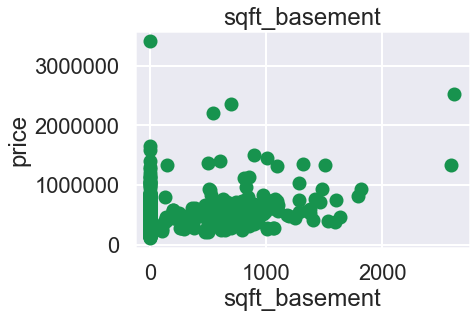

In [136]:
# Confirming that changes to basement column doesn't yield invalid values such
# as negatives
plt.scatter(basement_missing['sqft_basement'], basement_missing.price)
plt.xlabel('sqft_basement')
plt.ylabel('price')
plt.title('sqft_basement')
plt.show()

In [187]:
# Changing the basement column for the dataset
data5 = data4
data5['sqft_basement'] = data5['sqft_living'] - data5['sqft_above']
data5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              21420 non-null  int64  
 1   price           21420 non-null  float64
 2   bedrooms        21420 non-null  int64  
 3   bathrooms       21420 non-null  float64
 4   sqft_living     21420 non-null  int64  
 5   sqft_lot        21420 non-null  int64  
 6   floors          21420 non-null  float64
 7   waterfront      21420 non-null  int64  
 8   condition       21420 non-null  int64  
 9   grade           21420 non-null  int64  
 10  sqft_above      21420 non-null  int64  
 11  sqft_basement   21420 non-null  int64  
 12  yr_built        21420 non-null  int64  
 13  zipcode         21420 non-null  int64  
 14  lat             21420 non-null  float64
 15  long            21420 non-null  float64
 16  sqft_living15   21420 non-null  int64  
 17  sqft_lot15      21420 non-null 

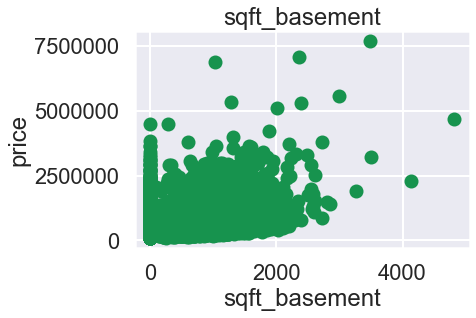

In [138]:
plt.scatter(data5['sqft_basement'], data5.price)
plt.xlabel('sqft_basement')
plt.ylabel('price')
plt.title('sqft_basement')
plt.show()

## Dealing with outliers and data types

In [139]:
data5.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.142000e+04,2.142000e+04,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.00000,21420.000000,21420.000000,21420.000000,21420.000000
mean,4.580940e+09,5.418614e+05,3.373950,2.118429,2083.132633,1.512804e+04,1.495985,0.006816,0.233987,3.410784,7.662792,1791.170215,291.962418,1971.092997,68.956723,98077.87437,47.560197,-122.213784,1988.384080,12775.718161
std,2.876761e+09,3.675569e+05,0.925405,0.768720,918.808412,4.153080e+04,0.540081,0.082280,0.765437,0.650035,1.171971,828.692965,442.875502,29.387141,364.552298,53.47748,0.138589,0.140791,685.537057,27345.621867
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.00000,47.155900,-122.519000,399.000000,651.000000
25%,2.123537e+09,3.249500e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.00000,47.471200,-122.328000,1490.000000,5100.000000
50%,3.904921e+09,4.505500e+05,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.00000,47.572100,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,560.000000,1997.000000,0.000000,98117.00000,47.678100,-122.125000,2370.000000,10086.250000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.00000,47.777600,-121.315000,6210.000000,871200.000000


Looking at the min and max values for each column, I noticed that one house was listed as 33 houses and decided to examine it further.

In [140]:
data5.loc[data5['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


Looking at the square footage of the home leads me to believe that this was a typo and was meant to be 3 instead of 33. Changing the bedroom column will allow me to correct it.

In [141]:
data5.loc[data5['bedrooms'] == 33,'bedrooms'] = 3

In [142]:
# Confirming changes were made
data5.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.142000e+04,2.142000e+04,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.00000,21420.000000,21420.000000,21420.000000,21420.000000
mean,4.580940e+09,5.418614e+05,3.372549,2.118429,2083.132633,1.512804e+04,1.495985,0.006816,0.233987,3.410784,7.662792,1791.170215,291.962418,1971.092997,68.956723,98077.87437,47.560197,-122.213784,1988.384080,12775.718161
std,2.876761e+09,3.675569e+05,0.902995,0.768720,918.808412,4.153080e+04,0.540081,0.082280,0.765437,0.650035,1.171971,828.692965,442.875502,29.387141,364.552298,53.47748,0.138589,0.140791,685.537057,27345.621867
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.00000,47.155900,-122.519000,399.000000,651.000000
25%,2.123537e+09,3.249500e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.00000,47.471200,-122.328000,1490.000000,5100.000000
50%,3.904921e+09,4.505500e+05,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.00000,47.572100,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,560.000000,1997.000000,0.000000,98117.00000,47.678100,-122.125000,2370.000000,10086.250000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.00000,47.777600,-121.315000,6210.000000,871200.000000


In [143]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21420 non-null  int64  
 1   date           21420 non-null  object 
 2   price          21420 non-null  float64
 3   bedrooms       21420 non-null  int64  
 4   bathrooms      21420 non-null  float64
 5   sqft_living    21420 non-null  int64  
 6   sqft_lot       21420 non-null  int64  
 7   floors         21420 non-null  float64
 8   waterfront     21420 non-null  int64  
 9   view           21420 non-null  int64  
 10  condition      21420 non-null  int64  
 11  grade          21420 non-null  int64  
 12  sqft_above     21420 non-null  int64  
 13  sqft_basement  21420 non-null  int64  
 14  yr_built       21420 non-null  int64  
 15  yr_renovated   21420 non-null  int64  
 16  zipcode        21420 non-null  int64  
 17  lat            21420 non-null  float64
 18  long  

The next variable type I will deal with is date due to the fact that it is a string type. I will first convert it to datetime.

### Changing date column 

In [168]:
# Changing date to date time and confirming changes
data5['date'] = pd.to_datetime(data5['date'])
data5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              21420 non-null  int64         
 1   date            21420 non-null  datetime64[ns]
 2   price           21420 non-null  float64       
 3   bedrooms        21420 non-null  int64         
 4   bathrooms       21420 non-null  float64       
 5   sqft_living     21420 non-null  int64         
 6   sqft_lot        21420 non-null  int64         
 7   floors          21420 non-null  float64       
 8   waterfront      21420 non-null  int64         
 9   view            21420 non-null  int64         
 10  condition       21420 non-null  int64         
 11  grade           21420 non-null  int64         
 12  sqft_above      21420 non-null  int64         
 13  sqft_basement   21420 non-null  int64         
 14  yr_built        21420 non-null  int64         
 15  yr

Due to the fact that datetime is not compatible with linear regressions models, I decided to separate each section of date into its own numerical columns. I decided to separate month and year sold.

In [171]:
# Parsing the month and year and creating new columns for the dataframe
data5['month_sold'] = pd.DatetimeIndex(data5['date']).month
data5['year_sold'] = pd.DatetimeIndex(data5['date']).year
data5.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_yard,bed_bath_ratio,month_sold,year_sold
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,98178,47.5112,-122.257,1340,5650,4470,3.00,10,2014
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1991,98125,47.7210,-122.319,1690,7639,4672,1.33,12,2014
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,98028,47.7379,-122.233,2720,8062,9230,2.00,2,2015
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,98136,47.5208,-122.393,1360,5000,3040,1.33,12,2014
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,98074,47.6168,-122.045,1800,7503,6400,1.50,2,2015


In [174]:
# Dropping date column because it is no longer needed
data5.drop(['date'], axis = 1, inplace = True)
data5.head()

KeyError: "['date'] not found in axis"

## Dealing with Categorical Variables

In order to make a regression model, I needed to first deal with any categorical variables and transform them to be compatible.

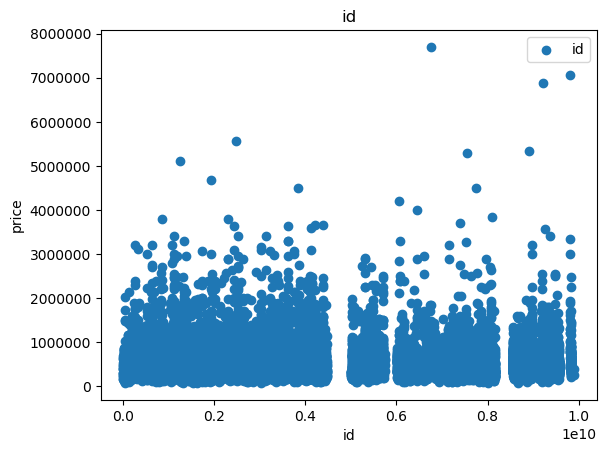

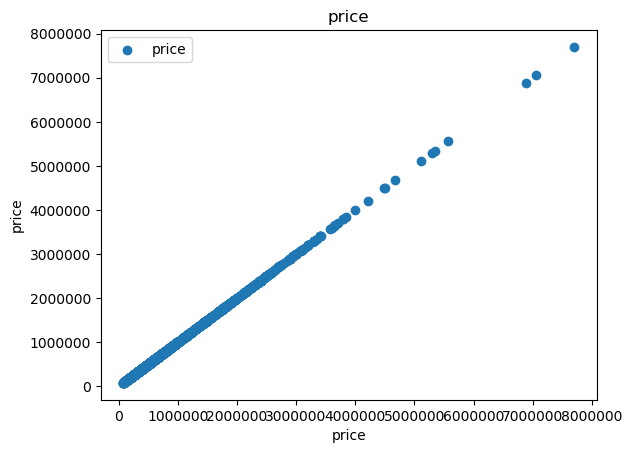

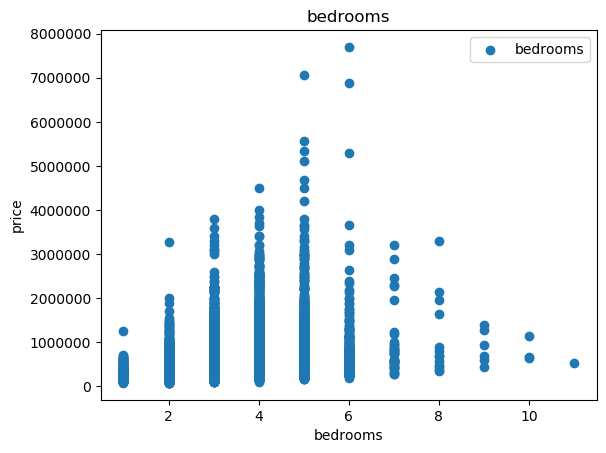

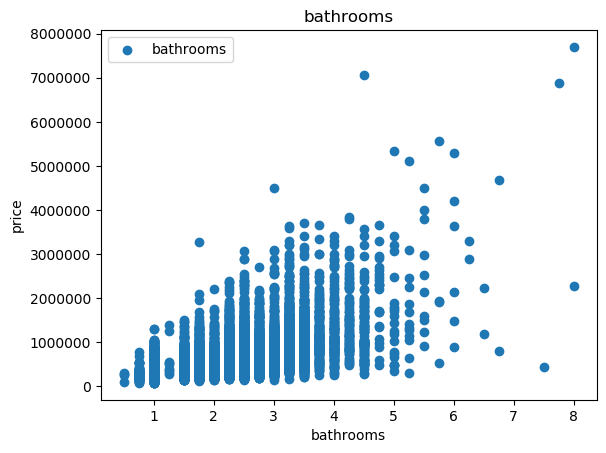

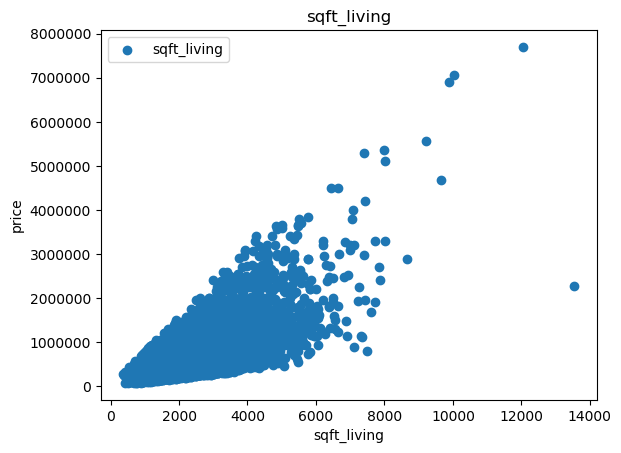

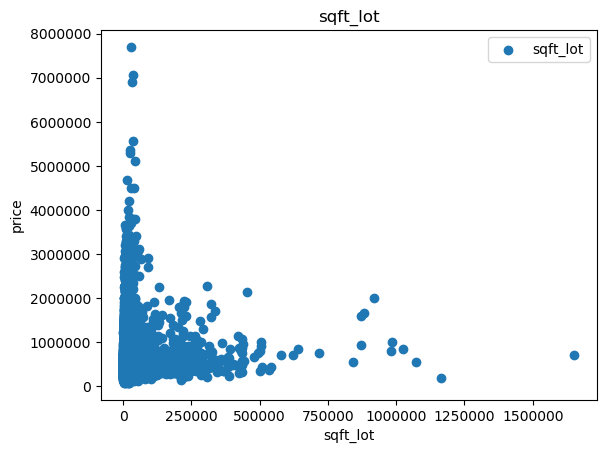

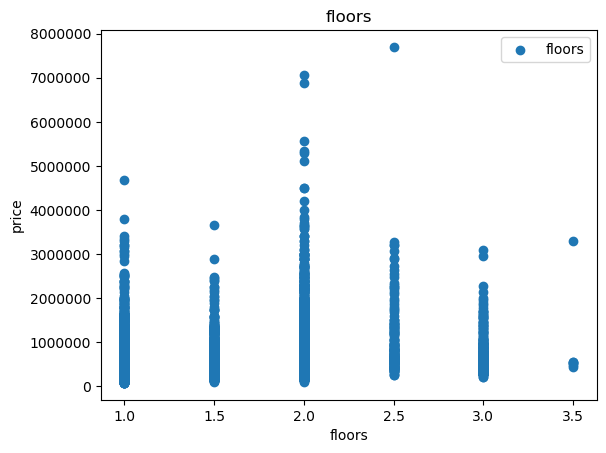

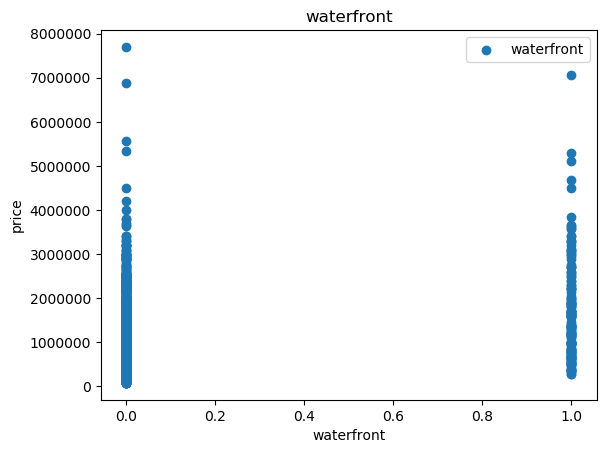

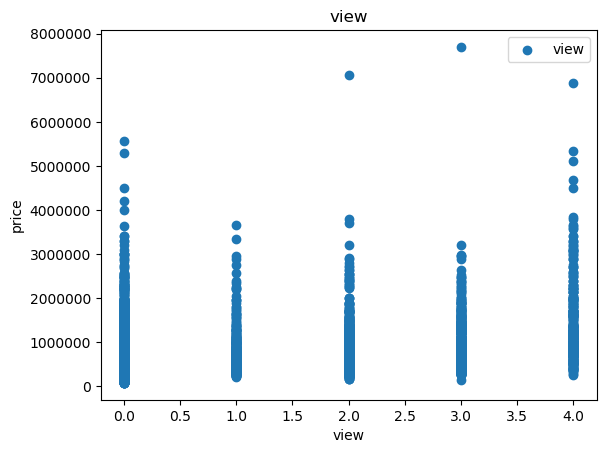

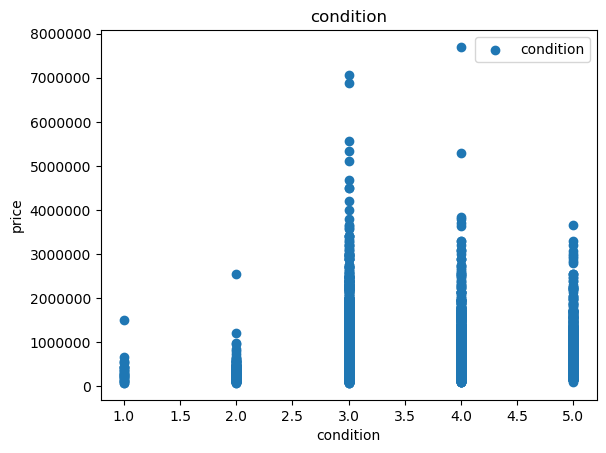

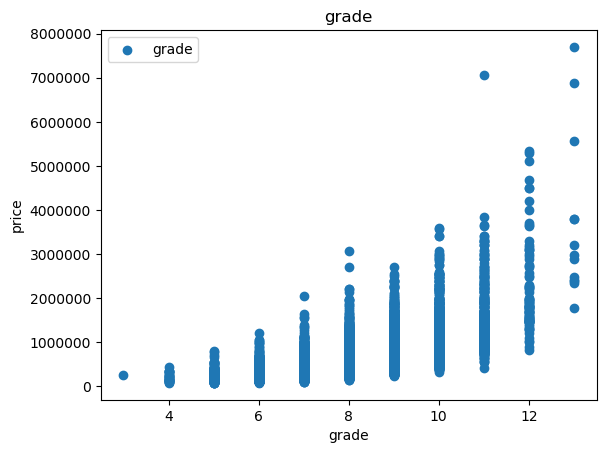

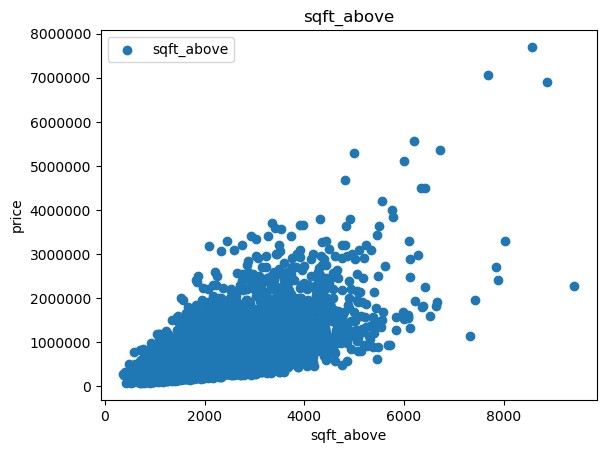

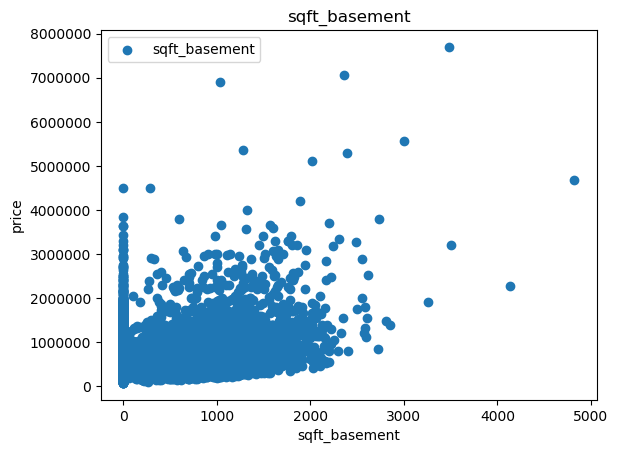

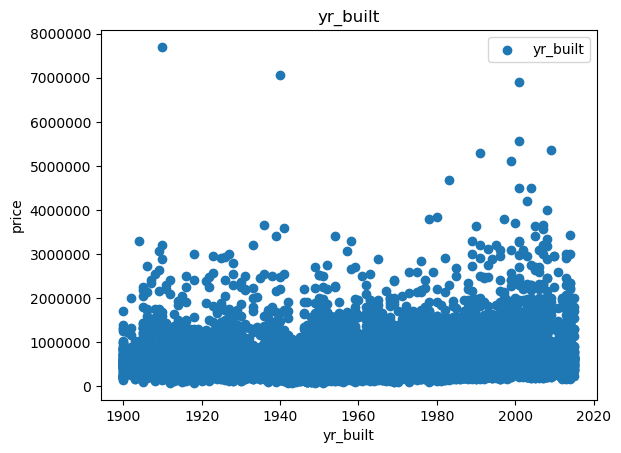

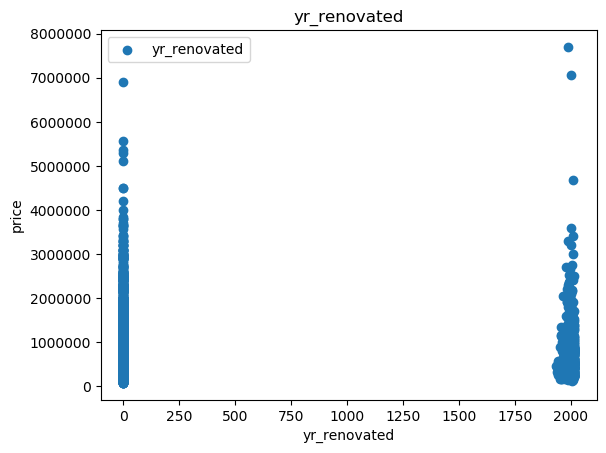

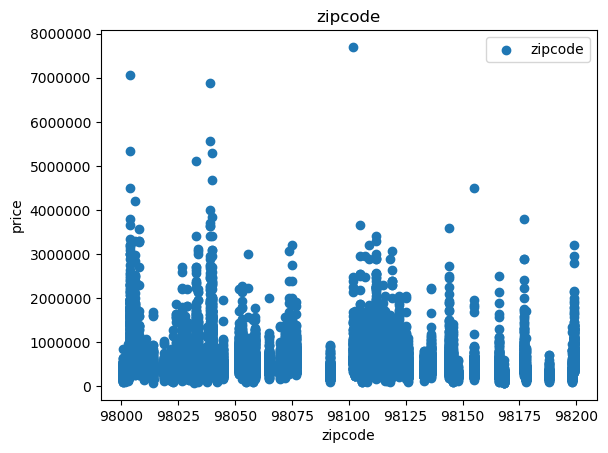

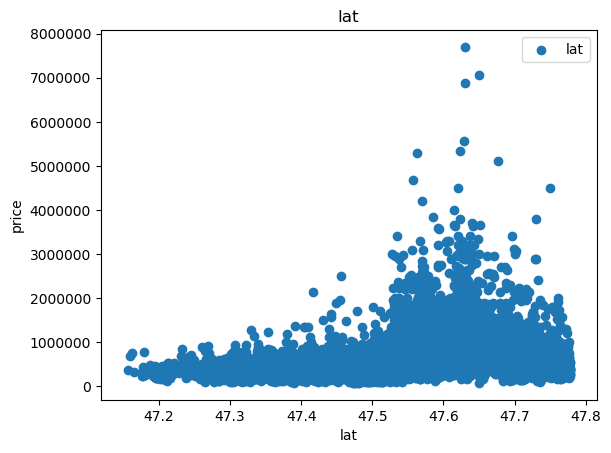

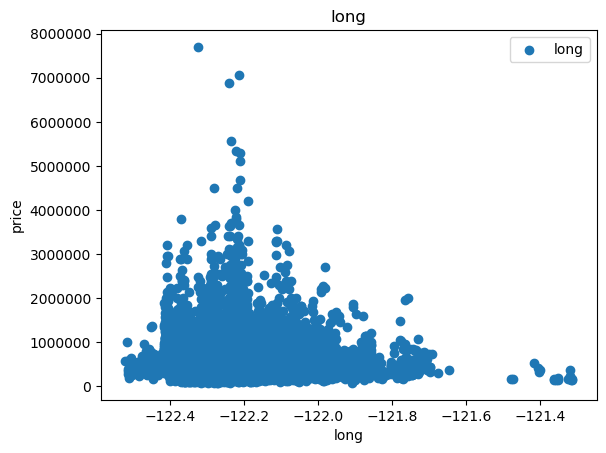

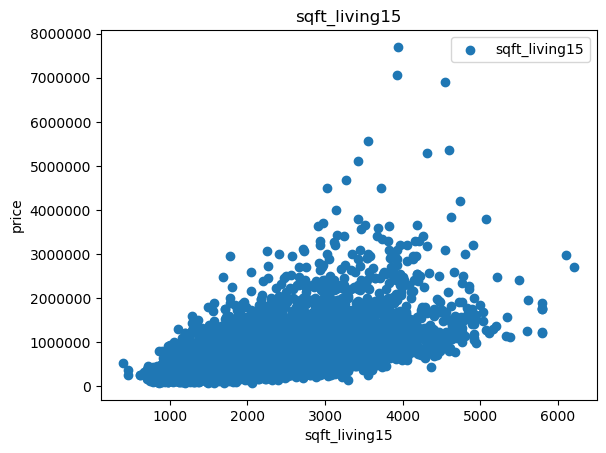

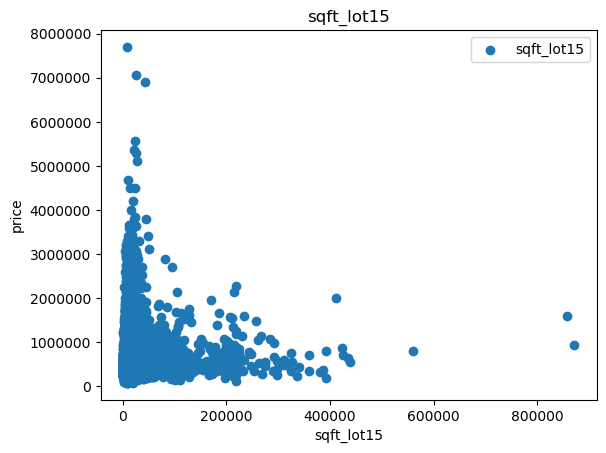

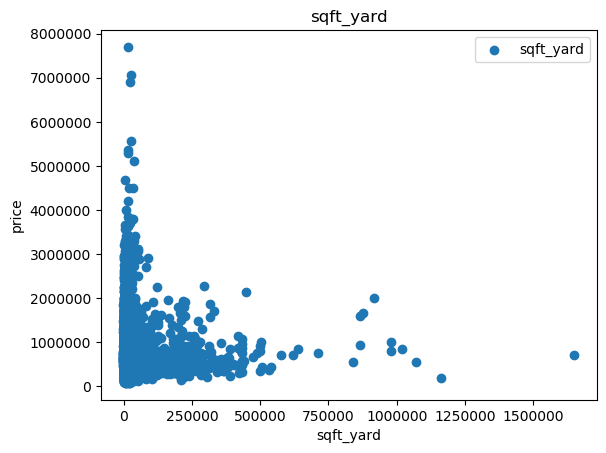

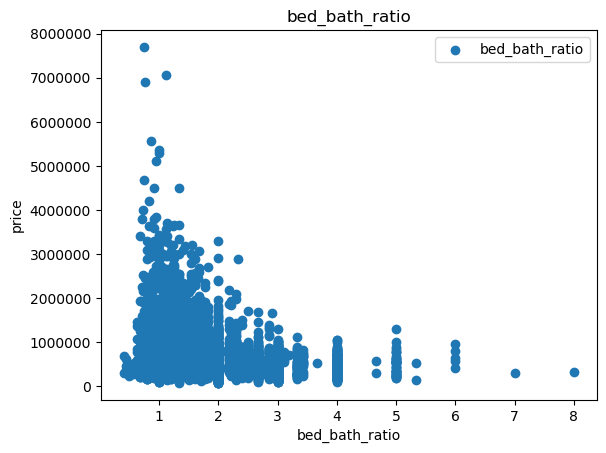

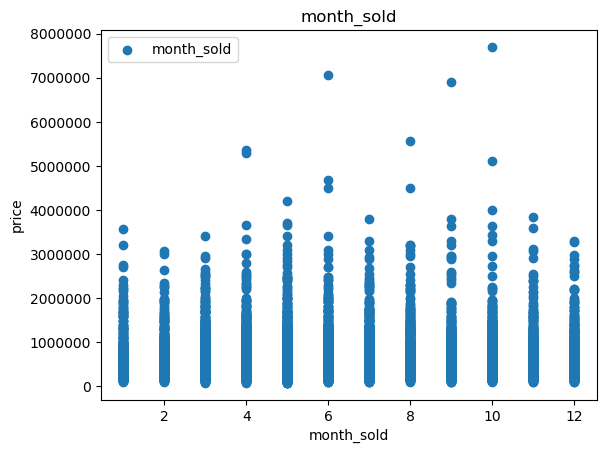

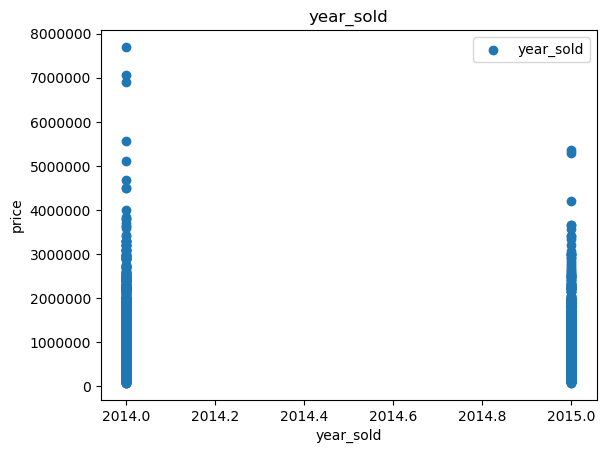

In [178]:
# Plotting all columns in order to distinguish between categorical and continuous variables
for col in data5.columns: 
    plt.scatter(data5[col], data5.price, label=col)
    plt.legend()
    plt.xlabel(col)
    plt.ylabel('price')
    plt.title(col)
    plt.show()

The following variables were immediately observed to be categorical variables:
bedrooms, bathrooms, floors, waterfront, view, condition, grade, zipcode, month_sold, year_sold

Certain variables could be converted to binary variables for ease of analysis. These variables are view, yr_renovated, year_sold. I will first work on the binary variables before deciding how to handle the categorical variables.

### Binary Columns 

In [182]:
# Creates a new column and maps a 1 if the house has been renovated or a 0 if not

data5['is_renovated'] = data5['yr_renovated'].map(lambda x: 1 if x > 0 else 0)
data5.drop(['yr_renovated'], axis = 1, inplace = True)
data5.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_yard,bed_bath_ratio,month_sold,year_sold,is_renovated
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,98178,47.5112,-122.257,1340,5650,4470,3.00,10,2014,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,98125,47.7210,-122.319,1690,7639,4672,1.33,12,2014,1
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,98028,47.7379,-122.233,2720,8062,9230,2.00,2,2015,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,98136,47.5208,-122.393,1360,5000,3040,1.33,12,2014,0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,98074,47.6168,-122.045,1800,7503,6400,1.50,2,2015,0


In [183]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              21420 non-null  int64  
 1   price           21420 non-null  float64
 2   bedrooms        21420 non-null  int64  
 3   bathrooms       21420 non-null  float64
 4   sqft_living     21420 non-null  int64  
 5   sqft_lot        21420 non-null  int64  
 6   floors          21420 non-null  float64
 7   waterfront      21420 non-null  int64  
 8   view            21420 non-null  int64  
 9   condition       21420 non-null  int64  
 10  grade           21420 non-null  int64  
 11  sqft_above      21420 non-null  int64  
 12  sqft_basement   21420 non-null  int64  
 13  yr_built        21420 non-null  int64  
 14  zipcode         21420 non-null  int64  
 15  lat             21420 non-null  float64
 16  long            21420 non-null  float64
 17  sqft_living15   21420 non-null 

In [184]:
# Created a viewed column and dropping unneeded view column
data5['was_viewed'] = data5['view'].map(lambda x: 1 if x > 0 else 0)
data5.drop(['view'], axis = 1, inplace = True)
data5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              21420 non-null  int64  
 1   price           21420 non-null  float64
 2   bedrooms        21420 non-null  int64  
 3   bathrooms       21420 non-null  float64
 4   sqft_living     21420 non-null  int64  
 5   sqft_lot        21420 non-null  int64  
 6   floors          21420 non-null  float64
 7   waterfront      21420 non-null  int64  
 8   condition       21420 non-null  int64  
 9   grade           21420 non-null  int64  
 10  sqft_above      21420 non-null  int64  
 11  sqft_basement   21420 non-null  int64  
 12  yr_built        21420 non-null  int64  
 13  zipcode         21420 non-null  int64  
 14  lat             21420 non-null  float64
 15  long            21420 non-null  float64
 16  sqft_living15   21420 non-null  int64  
 17  sqft_lot15      21420 non-null 

In [190]:
# Created a sold in 2014 column
data5['2014_sold'] = data5['year_sold'].map(lambda x: 1 if x == 2014 else 0)
data5.drop(['year_sold'], axis = 1, inplace = True)
data5.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,...,lat,long,sqft_living15,sqft_lot15,sqft_yard,bed_bath_ratio,month_sold,is_renovated,was_viewed,2014_sold
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,3,7,...,47.5112,-122.257,1340,5650,4470,3.00,10,0,0,1
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,3,7,...,47.7210,-122.319,1690,7639,4672,1.33,12,1,0,1
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,3,6,...,47.7379,-122.233,2720,8062,9230,2.00,2,0,0,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,5,7,...,47.5208,-122.393,1360,5000,3040,1.33,12,0,0,1
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,3,8,...,47.6168,-122.045,1800,7503,6400,1.50,2,0,0,0


### Creating Dummy Variables 

In [200]:
dummytest = data5
dummytest.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,...,lat,long,sqft_living15,sqft_lot15,sqft_yard,bed_bath_ratio,month_sold,is_renovated,was_viewed,2014_sold
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,3,7,...,47.5112,-122.257,1340,5650,4470,3.00,10,0,0,1
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,3,7,...,47.7210,-122.319,1690,7639,4672,1.33,12,1,0,1
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,3,6,...,47.7379,-122.233,2720,8062,9230,2.00,2,0,0,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,5,7,...,47.5208,-122.393,1360,5000,3040,1.33,12,0,0,1
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,3,8,...,47.6168,-122.045,1800,7503,6400,1.50,2,0,0,0


In [202]:
dummytest['bedrooms'] = dummytest['bedrooms'].astype('category')
dummytest.info()
#dummies = pd.get_dummies(dummytest, columns = ['bedrooms'], prefix='bedrooms', drop_first=True)

#test_preprocessed = dummytest.drop(['bedrooms'], axis=1)

#test = pd.concat([test_preprocessed, dummies], axis=1)

#test_preprocessed.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   id              21420 non-null  int64   
 1   price           21420 non-null  float64 
 2   bedrooms        21420 non-null  category
 3   bathrooms       21420 non-null  float64 
 4   sqft_living     21420 non-null  int64   
 5   sqft_lot        21420 non-null  int64   
 6   floors          21420 non-null  float64 
 7   waterfront      21420 non-null  int64   
 8   condition       21420 non-null  int64   
 9   grade           21420 non-null  int64   
 10  sqft_above      21420 non-null  int64   
 11  sqft_basement   21420 non-null  int64   
 12  yr_built        21420 non-null  int64   
 13  zipcode         21420 non-null  int64   
 14  lat             21420 non-null  float64 
 15  long            21420 non-null  float64 
 16  sqft_living15   21420 non-null  int64   
 17  sqft_lot15  

## Finalizing and Exporting Cleaned Dataset

0    19316
1     2104
Name: was_viewed, dtype: int64

# Question 1: What effect does a house's yard size have on its price?

Having a large house yard is a highly desirable feature for a new house. I wanted to examine whether a larger yard is indicative of a more expensive house.

In [146]:
data6 = data5
data6

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [147]:
#Creating the yard size column by subtracting the sqft of the house from the lot
data6['sqft_yard'] = data6['sqft_lot'] - data6['sqft_living']
data6

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_yard
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,4470
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,4672
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,9230
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,3040
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,6400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,0,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,-399
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,0,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,3503
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,0,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,330
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,0,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,788


In [148]:
data6.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_yard
count,2.142000e+04,2.142000e+04,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,21420.000000,21420.000000,21420.000000,...,21420.000000,21420.000000,21420.000000,21420.000000,21420.00000,21420.000000,21420.000000,21420.000000,21420.000000,2.142000e+04
mean,4.580940e+09,5.418614e+05,3.372549,2.118429,2083.132633,1.512804e+04,1.495985,0.006816,0.233987,3.410784,...,1791.170215,291.962418,1971.092997,68.956723,98077.87437,47.560197,-122.213784,1988.384080,12775.718161,1.304491e+04
std,2.876761e+09,3.675569e+05,0.902995,0.768720,918.808412,4.153080e+04,0.540081,0.082280,0.765437,0.650035,...,828.692965,442.875502,29.387141,364.552298,53.47748,0.138589,0.140791,685.537057,27345.621867,4.138212e+04
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,370.000000,0.000000,1900.000000,0.000000,98001.00000,47.155900,-122.519000,399.000000,651.000000,-1.900000e+03
25%,2.123537e+09,3.249500e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,1200.000000,0.000000,1952.000000,0.000000,98033.00000,47.471200,-122.328000,1490.000000,5100.000000,3.080000e+03
50%,3.904921e+09,4.505500e+05,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,0.000000,0.000000,3.000000,...,1560.000000,0.000000,1975.000000,0.000000,98065.00000,47.572100,-122.230000,1840.000000,7620.000000,5.700000e+03
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,0.000000,0.000000,4.000000,...,2220.000000,560.000000,1997.000000,0.000000,98117.00000,47.678100,-122.125000,2370.000000,10086.250000,8.665250e+03
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,9410.000000,4820.000000,2015.000000,2015.000000,98199.00000,47.777600,-121.315000,6210.000000,871200.000000,1.650059e+06


In [158]:
# Removing instances where sqft_yard is negative. Mostly seen with houses with
# multiple floors 

yard_area = data6.loc[data6['sqft_yard'] > 0]

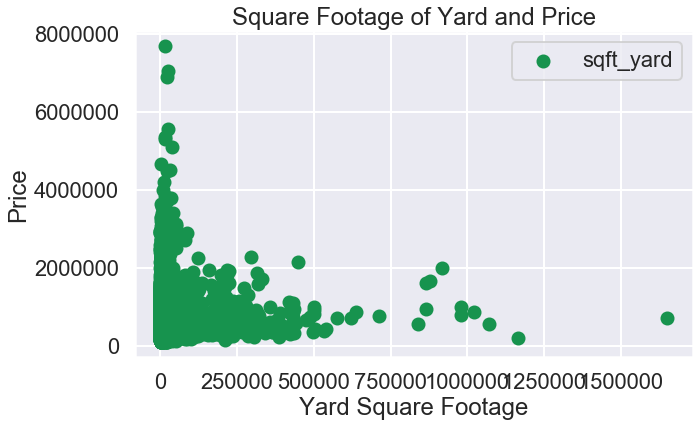

In [150]:
plt.figure(figsize = (10,6))
plt.scatter(yard_area['sqft_yard'], yard_area.price, label='sqft_yard')
plt.legend()
plt.xlabel('Yard Square Footage')
plt.ylabel('Price')
plt.title('Square Footage of Yard and Price')
plt.show()

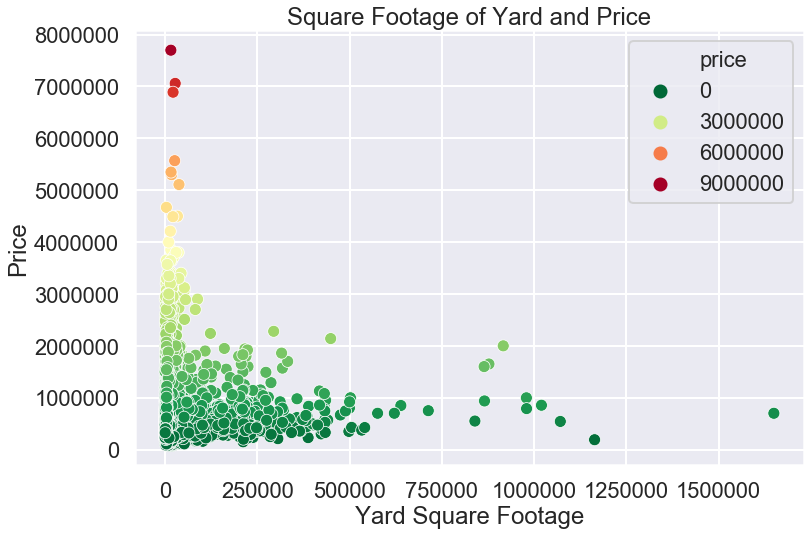

In [166]:
plt.figure(figsize = (12,8))
sns.set_context("poster")
sns.scatterplot(x = 'sqft_yard', y = 'price', data=yard_area, hue= 'price', palette = "RdYlGn_r")
plt.xlabel('Yard Square Footage')
plt.ylabel('Price')
plt.title('Square Footage of Yard and Price')
plt.legend(fancybox=True)
plt.show()

# Question 2: How does a bedroom to bathroom ratio affect the price of a house?

Having an appropriate amount of bedrooms and bathrooms is ideal for homeowners seeking a family house. For this we wanted to see whether the ratio of bedroom to bathrooms would impact the price of a house. A lower ratio is more ideal.

In [152]:
data7 = data5
data7.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_yard
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,4470
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,4672
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,9230
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,3040
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,6400


In [153]:
# Creates the column for the bed/bath ratio. I limited the ratio to below 4
# as it wouldn't be an ideal setup in a house for larger families

data7['bed_bath_ratio'] = round(data7['bedrooms'] / data7['bathrooms'],2)
bed_bath = data7.loc[data7['bed_bath_ratio'] < 4]

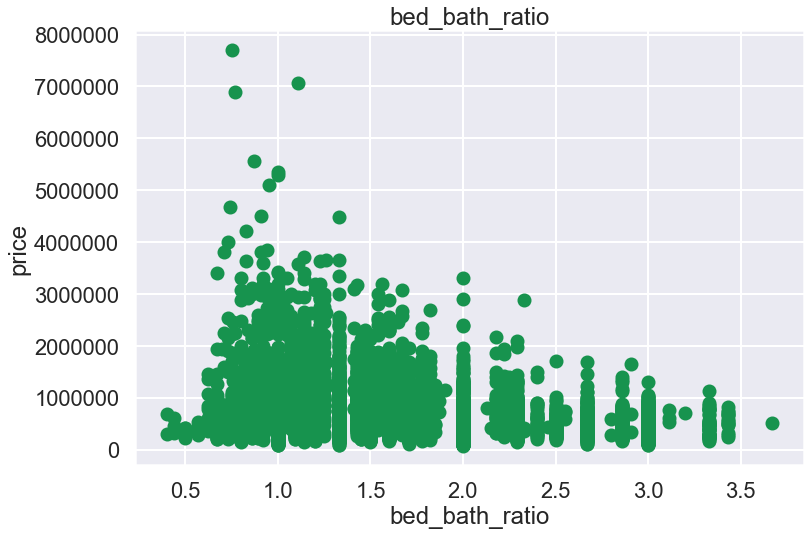

In [154]:
plt.figure(figsize = (12,8))
plt.scatter(bed_bath['bed_bath_ratio'], bed_bath.price, label='bed_bath_ratio')
plt.xlabel('bed_bath_ratio')
plt.ylabel('price')
plt.title('bed_bath_ratio')
plt.show()

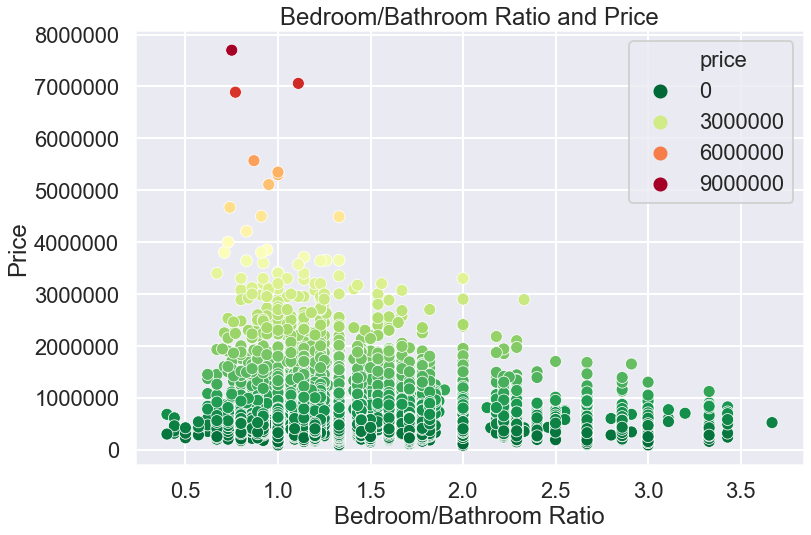

In [155]:
plt.figure(figsize = (12,8))
sns.set_context("poster")
sns.scatterplot(x = 'bed_bath_ratio', y = 'price', data=bed_bath, hue= 'price', palette = 'RdYlGn_r')
plt.xlabel('Bedroom/Bathroom Ratio')
plt.ylabel('Price')
plt.title('Bedroom/Bathroom Ratio and Price')
plt.legend(fancybox=True)
plt.show()

I observed that lower ratios generally corresponded with higher house prices. This would be in part due to houses that contained a high and near identical number of bedrooms and bathrooms. Home buyers that are planning larger families would have to plan accordingly as to what structure they want in their home.

# Question 3 and 4: How do housing prices change based on the age of the house? How did housing sizes evolve over time?

I wanted to observe whether housing prices were affected by the year in which a house was built. I also wanted to observe whether there had been any changes in housing sizes over the years.

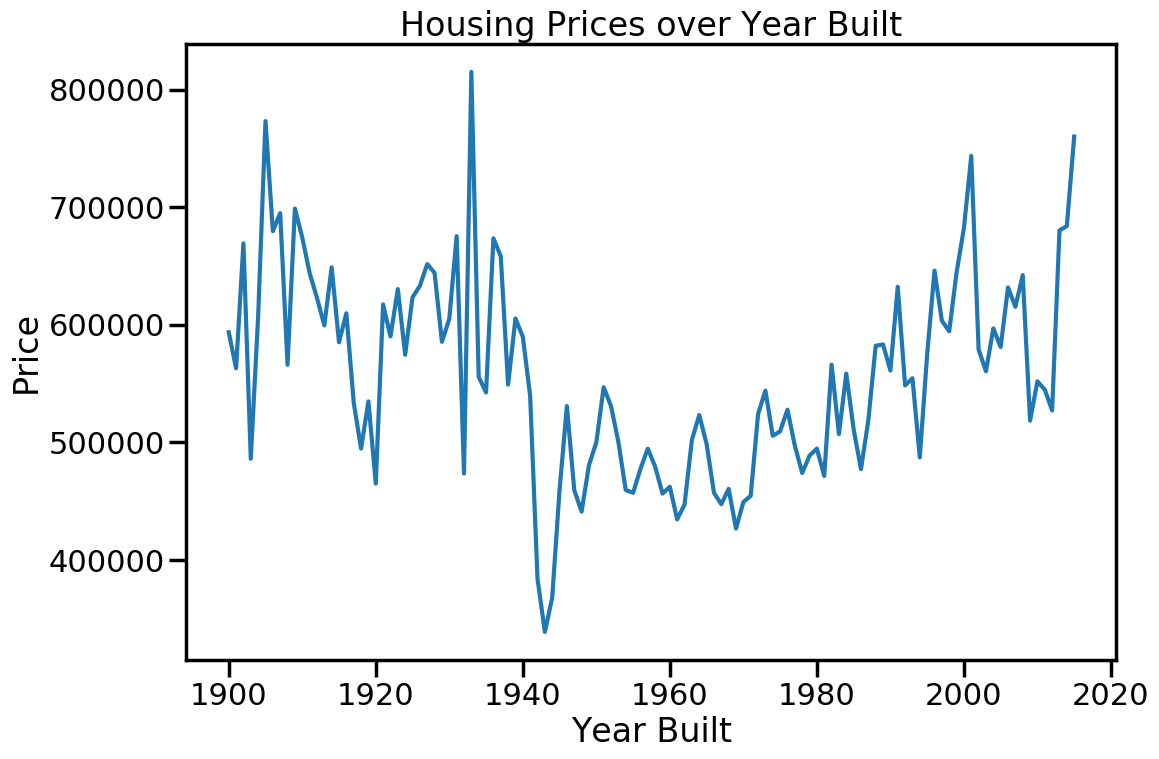

In [179]:
plt.figure(figsize = (12,8))
sns.set_context("poster")
sns.lineplot(x = 'yr_built', y = 'price', data=bed_bath, ci = None)
plt.xlabel('Year Built')
plt.ylabel('Price')
plt.title('Housing Prices over Year Built')
plt.show()

Housing prices fluctuates greatly according to the year in which a house was built. The highest peaks were observed both in pre-war era houses as well as more recent years. This may correspond to the novelty and historical aspects of a pre-war building as well the more modern designs. A family looking to buy cheaper homes may need to focus on homes built between 1940 and 1990.

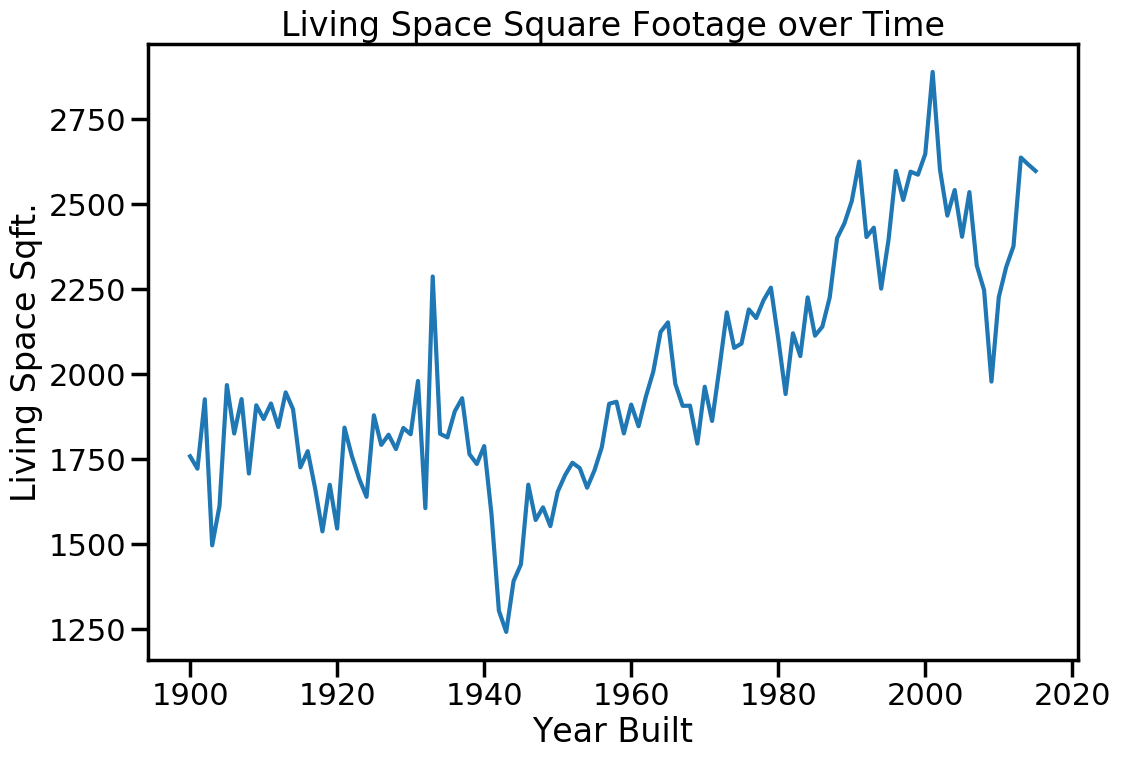

In [180]:
plt.figure(figsize = (12,8))
sns.set_context("poster")
sns.lineplot(x = 'yr_built', y = 'sqft_living', data=bed_bath, ci = None)
plt.xlabel('Year Built')
plt.ylabel('Living Space Sqft.')
plt.title('Living Space Square Footage over Time')
plt.show()

I observed that the average living space began to increase significantly after the 1940s. This is most likely due to increased homeownership and the concept of investing in one's home being popularized.